## Algorithms

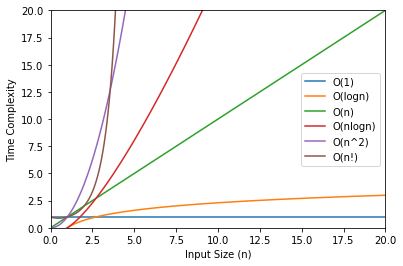

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy


# O(1) plot
x = np.linspace(0.1, 50, 1000)
y = [1] * 1000
plt.plot(x, y)

# O(logn) plot
x_log = np.linspace(0.1, 50, 1000)
y_log = np.log(x_log)
plt.plot(x_log, y_log)

# O(n) plot
x = np.linspace(0.1, 25, 100)
y = x
plt.plot(x, y)

# O(nlogn) plot
x_log = np.linspace(0.1, 10, 100)
y_log = x_log * np.log(x_log)
plt.plot(x_log, y_log)

# O(n^2) plot
x = np.linspace(0.1, 5, 100)
y = x**2
plt.plot(x, y)

# O(n!) plot
x = np.linspace(0.1, 4, 50)
y = scipy.special.factorial(x)
plt.plot(x, y)

plt.xlabel('Input Size (n)')
plt.ylabel('Time Complexity')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.legend(['O(1)', 'O(logn)','O(n)', 'O(nlogn)', 'O(n^2)', 'O(n!)'])
plt.show()

In [1]:
from aiohttp import ClientSession
from bs4 import BeautifulSoup as BS

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) '
                         'Chrome/39.0.2171.95 Safari/537.36'}
async with ClientSession() as session:
    async with session.get("https://simple.wikipedia.org/wiki/List_of_countries",
                           headers=headers) as countries_wiki:
        html = BS(await countries_wiki.text(), 'lxml')
        data = html.find('div', class_='mw-parser-output')
        countries = []
        for a in data.find_all('p'):
            for i in a.find_all('a', href=True):
                countries.append(i.get("title").lower())
        print(countries)

['sovereign state', 'afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'the bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina faso', 'burundi', 'cambodia', 'cameroon', 'canada', 'cape verde', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'democratic republic of the congo', 'republic of the congo', 'costa rica', 'croatia', 'cuba', 'cyprus', 'czech republic', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'east timor', 'ecuador', 'egypt', 'el salvador', 'equatorial guinea', 'eritrea', 'estonia', 'eswatini', 'ethiopia', 'fiji', 'finland', 'france', 'gabon', 'the gambia', 'georgia (country)', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'honduras', 'hungary', 'iceland',

In [3]:
from bs4 import BeautifulSoup as BS
from aiohttp import ClientSession
from fuzzywuzzy import fuzz
import re

img = ""

async def get_countries():
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) '
                             'Chrome/39.0.2171.95 Safari/537.36'}
    async with ClientSession() as session:
        async with session.get("https://simple.wikipedia.org/wiki/List_of_countries",
                               headers=headers) as countries_wiki:
            html = BS(await countries_wiki.text(), 'lxml')
            data = html.find('div', class_='mw-parser-output')
            countries = []
            for a in data.find_all('p'):
                for i in a.find_all('a', href=True):
                    countries.append(i.get("title").lower())
    return countries


async def get_countries_twb():
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) '
                             'Chrome/39.0.2171.95 Safari/537.36'}
    async with ClientSession() as session:
        async with session.get("https://data.worldbank.org/country",
                               headers=headers) as countries_wiki:
            html = BS(await countries_wiki.text(), 'lxml')
            info = html.find('div', class_="overviewArea body")
            countries = []
            for a in info.find_all('li'):
                for i in a.find_all('a', href=True):
                    countries.append(i.text.lower())
    return countries


async def find_country(country):
    try:
        countries = await get_countries()
        countries.extend(("usa", "us", "uk", "uae"))
        rate = 0
        fuzz_country = ""
        for i in countries:
            if rate < fuzz.partial_ratio(country, i):
                rate = fuzz.partial_ratio(country, i)
                fuzz_country = i

        if fuzz_country == "usa" or country == "usa":
            fuzz_country = "united states"
        elif fuzz_country == "us" or country == "us":
            fuzz_country = "united states"
        elif fuzz_country == "uk" or country == "uk":
            fuzz_country = "united kingdom"
        elif fuzz_country == "uae" or country == "uae":
            fuzz_country = "united arab emirates"

        data = "*" + fuzz_country.title() + "*\n"
        data = data + "\n" + "*Main info:*"

        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) '
                          'Chrome/39.0.2171.95 Safari/537.36'}
        async with ClientSession() as session:
            async with session.get("https://en.wikipedia.org/wiki/" + fuzz_country.replace(" ", "_"),
                                   headers=headers) as countries_wiki:
                html = BS(await countries_wiki.text(), 'lxml')
                info = html.find('table', class_='infobox ib-country vcard')
                img = info.find_all('img')[0].get('src')
                for i in info.find_all('tr'):
                    if i.find('th', class_='infobox-label') is not None:
                        current_str = i.find('th', class_='infobox-label').text.replace(u'\xa0', ' ')
                        if current_str.find("Capital") != -1:
                            data = data + "\n" + "Capital: " + i.find('a').text
                        elif current_str == "Largest city":
                            data = data + "\n" + "Largest city: " + i.find('a').text
                        elif current_str.find("Official") != -1 and current_str.find("lang") != -1:
                            data = data + "\n" + "Official languages: " + i.find('a').text
                        elif current_str == "Common languages":
                            data = data + "\n" + "Common languages: " + i.find('a').text
                        elif current_str == "Currency":
                            data = data + "\n" + "Currency: " + i.find('td').text
                        elif current_str == "Time zone":
                            data = data + "\n" + "Time zone: " + i.find('td').text
                        elif current_str == "Calling code":
                            data = data + "\n" + "Calling code: " + i.find('td').text

                fuzz_country_twb = fuzz_country
                countries_twb = get_countries_twb()
                rate = 0
                for i in await countries_twb:
                    if rate < fuzz.partial_ratio(fuzz_country, i):
                        rate = fuzz.partial_ratio(fuzz_country, i)
                        fuzz_country_twb = i

        async with ClientSession() as session:
            async with session.get("https://data.worldbank.org/country/" + fuzz_country_twb.replace(" ", "-"),
                                   headers=headers) as country_twb:
                html = BS(await country_twb.text(), 'lxml')
                for info in html.find_all('div', class_='indicator-item'):
                    for i in info.find_all('div', class_='indicator-item__inner'):
                        if i.find('div', class_='indicator-item__title') is not None:
                            try:
                                current_str = i.find('div', class_='indicator-item__title').text.replace(u'\xa0', ' ')
                                if current_str.find("Population, total") != -1:
                                    data = data + "\n" + "Population: " + \
                                           i.find('div', class_='indicator-item__data-info').text
                                elif current_str.find("Net migration") != -1:
                                    data = data + "\n" + "Net migration: " + \
                                           i.find('div', class_='indicator-item__data-info').text
                                elif current_str.find("GDP per capita") != -1:
                                    data = data + "\n" + "GDP per capita (current US$): " \
                                           + i.find('div', class_='indicator-item__data-info').text
                                elif current_str.find("GDP growth") != -1:
                                    data = data + "\n" + "GDP growth (annual %): " \
                                           + i.find('div', class_='indicator-item__data-info').text + "%"
                                elif current_str.find("Unemployment, total") != -1:
                                    data = data + "\n" + "Unemployment, total (% of total labor force): " \
                                           + i.find('div', class_='indicator-item__data-info').text + "%"
                                elif current_str.find("Inflation") != -1:
                                    data = data + "\n" + "Inflation, consumer prices (annual %): " \
                                           + i.find('div', class_='indicator-item__data-info').text + "%"
                                elif current_str.find("CO2 emissions") != -1:
                                    data = data + "\n" + "CO2 emissions (metric tons per capita): " \
                                           + i.find('div', class_='indicator-item__data-info').text
                                elif current_str.find("Access to electricity") != -1:
                                    data = data + "\n" + "Access to electricity (% of population): " \
                                           + i.find('div', class_='indicator-item__data-info').text + "%"
                                elif current_str.find("Electricity production") != -1:
                                    data = data + "\n" + "Electricity production from renewable sources, excluding " \
                                                         "hydroelectric (% of total): " + \
                                           i.find('div', class_='indicator-item__data-info').text + "%"
                                elif current_str.find("Individuals using the Internet") != -1:
                                    data = data + "\n" + "Individuals using the Internet (% of population): " \
                                           + i.find('div', class_='indicator-item__data-info').text + "%"
                                                        except:
                                continue
        return "https:" + img
    except:
        return "", "", ""
    
country = "us"
countries = []
img = await find_country(country)
print(img)

IndentationError: unexpected unindent (56426543.py, line 136)

In [33]:
country = country.title()
country = "United States"
data = ""
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/39.0.2171.95 Safari/537.36'}
async with ClientSession() as session:
    async with session.get("https://en.wikipedia.org/wiki/List_of_countries_by_tax_rates",
                           headers=headers) as wiki:
        html = BS(await wiki.text(), 'lxml')
        info = html.find_all('table')[2]
        tab = info.find('tbody')
        for i in tab.find_all('tr'):
            print(i)
            if i.find('td') is not None and i.find('td').text.find(country) != -1:
                company_taxes = "Company taxes: " + i.find_all('td')[1].text
                lmr = "Lowest marginal rate: " + i.find_all('td')[2].text
                hmr = "Highest marginal rate: " + i.find_all('td')[3].text
                vat = "value-added tax or goods and services tax: " + i.find_all('td')[4].text
                data = company_taxes + lmr + hmr + vat
                print(data)
                data = re.sub("([\[]).*?([\]])", "", data)
                print(data)

print(data)

<tr>
<th rowspan="2">Country
</th>
<th data-sort-type="number" rowspan="2"><a href="/wiki/Corporate_tax" title="Corporate tax">Corporate tax</a> (excl. dividend taxes)
</th>
<th colspan="2"><a href="/wiki/Income_tax" title="Income tax">Individual Income tax</a><sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th data-sort-type="number" rowspan="2"><a href="/wiki/Value-added_tax" title="Value-added tax">VAT or GST</a> or <a href="/wiki/Sales_tax" title="Sales tax">Sales tax</a>
</th>
<th rowspan="2"><a href="/wiki/Capital_gains_tax" title="Capital gains tax">Capital gains tax</a><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup>
</th>
<th class="unsortable" rowspan="2">Further reading
</th></tr>
<tr>
<th data-sort-type="number">Lowest marginal rate
</th>
<th data-sort-type="number">Highest marginal rate
</th></tr>
<tr>
<td><span class="datasortkey" data-sort-value="Afghanistan"><span class="flagicon"><span class="mw-image-border"